In [61]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

In [7]:
train_df = pd.read_csv("../data/consumption_cleaned.csv")

In [8]:
train_df["name"] = train_df["Unnamed: 0"]
train_df.drop(columns=["Unnamed: 0"], inplace=True)
train_df.set_index("name", inplace=True)

In [9]:
train_df.head()

,Jan21,Feb21,Mar21,Apr21,May21,Jun21,Jul21,Aug21,Sep21,Oct21,...,Jan23,Feb23,Mar23,Apr23,May23,Jun23,Jul23,Aug23,Sep23,Oct23
name,,,,,,,,,,,,,,,,,,,,,
Mr. Jimmy Odia,1177.621,1117.691,1158.780,1146.633,1061.041,631.351,871.766,81.779,0.000,505.308,...,818.277,883.510,1012.615,657.237,883.960,815.177,835.913,921.905,500.412,1011.005
Mr. Olusegun Oludare,2599.540,1985.674,2808.438,2829.113,2791.281,1409.972,1843.541,1622.039,1776.029,2158.781,...,2229.567,2565.410,3528.329,2600.305,2533.165,2364.500,2507.445,1206.003,1530.571,2736.848
Mr. Adeleke Emoruwa,5005.387,4982.429,4670.840,4697.450,4637.303,1992.345,2168.579,1786.731,1659.278,2006.606,...,1705.220,923.750,2371.780,1569.912,1863.398,1691.173,1876.940,1266.895,1295.564,2319.102
Mrs. Ronke Banjo,1288.816,1127.700,1498.733,1539.260,951.819,683.673,520.226,409.773,599.630,891.654,...,1143.710,1009.123,1175.684,658.944,939.138,1234.027,734.642,563.968,420.225,830.205
Mr. Temile Godwin,40.004,973.423,955.216,1083.789,886.085,339.644,1639.332,1135.765,515.190,160.837,...,726.659,388.594,340.505,946.513,79.397,111.511,291.156,88.259,472.198,174.347


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

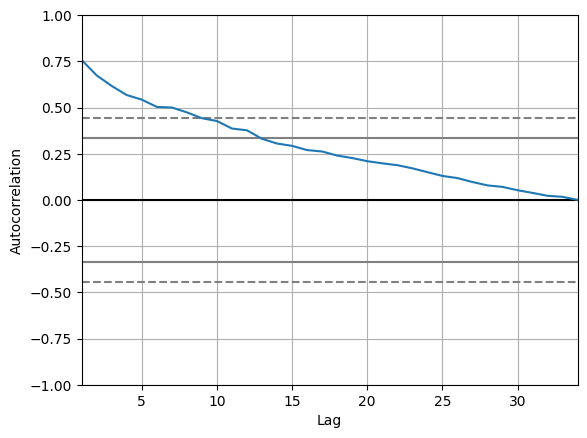

In [70]:
autocorrelation_plot(train_df.T.values)

##### ARIMA 

34

In [63]:
def fit(data):
    model = ARIMA(
        data,order=(10, 1, 1)
    )

    model_fit = model.fit()
    return model_fit


def predict(model_fit, data):
    return model_fit.forecast()

In [73]:
predictors = {}
test = train_df["Oct23"]
train = train_df.drop(columns=["Oct23"])
for i in range(len(train)):
    model_fit = fit(train.values[i])
    predictors[train.index[i]] = model_fit

/home/abundance/.cache/pypoetry/virtualenvs/golibe-project-_tERVNKu-py3.12/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyError: 'name'

In [81]:
#get index column in train
train.index[0]

'Mr. Jimmy Odia'

<Axes: >

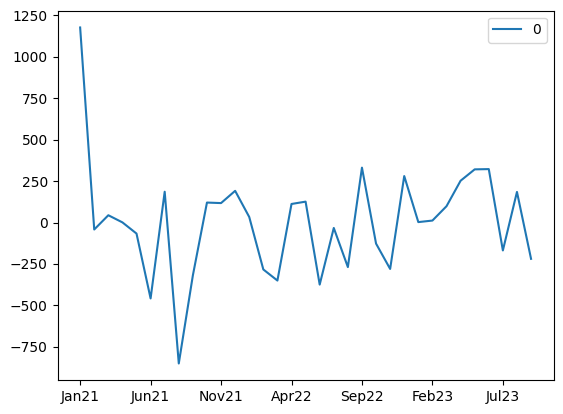

In [56]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

                 0
count    33.000000
mean      2.436930
std     337.719786
min    -850.569958
25%    -218.933514
50%      12.139277
75%     184.986510
max    1177.621000


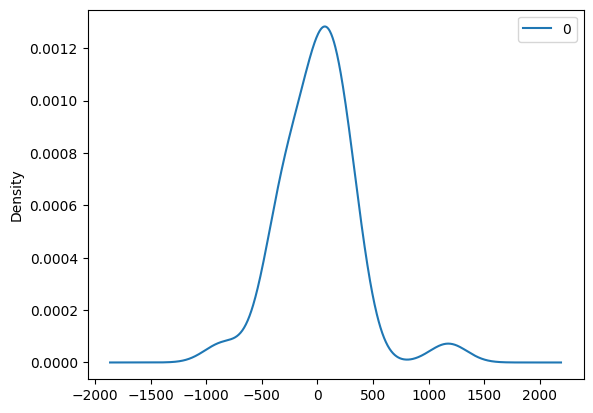

In [57]:
residuals.plot(kind='kde')
print(residuals.describe())

In [62]:
prediction = model_fit.forecast()
real = train_df.iloc[0][-1] 
root_mean_squared_error([real], prediction)
# print(f"Predicted: {prediction}, Real: {real}")

/home/abundance/.cache/pypoetry/virtualenvs/golibe-project-_tERVNKu-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/abundance/.cache/pypoetry/virtualenvs/golibe-project-_tERVNKu-py3.12/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_159264/3120558485.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  real = train_df.iloc[0][-1]


np.float64(210.12389411889887)